## Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from emnist import extract_training_samples, extract_test_samples

## Import Data

In [2]:
num_classes = 62

x_train, y_train = extract_training_samples('byclass')
x_test, y_test = extract_test_samples('byclass')

In [3]:
# Split the train to train and validation
x_train, x_val,  y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
print(f"Train data shape: ({x_train.shape}, {y_train.shape})")
print(f"Test data shape: ({x_test.shape}, {y_test.shape})")
print(f"Validation data shape: ({x_val.shape}, {y_val.shape})")

Train data shape: ((558345, 28, 28), (558345,))
Test data shape: ((116323, 28, 28), (116323,))
Validation data shape: ((139587, 28, 28), (139587,))


## Visualize

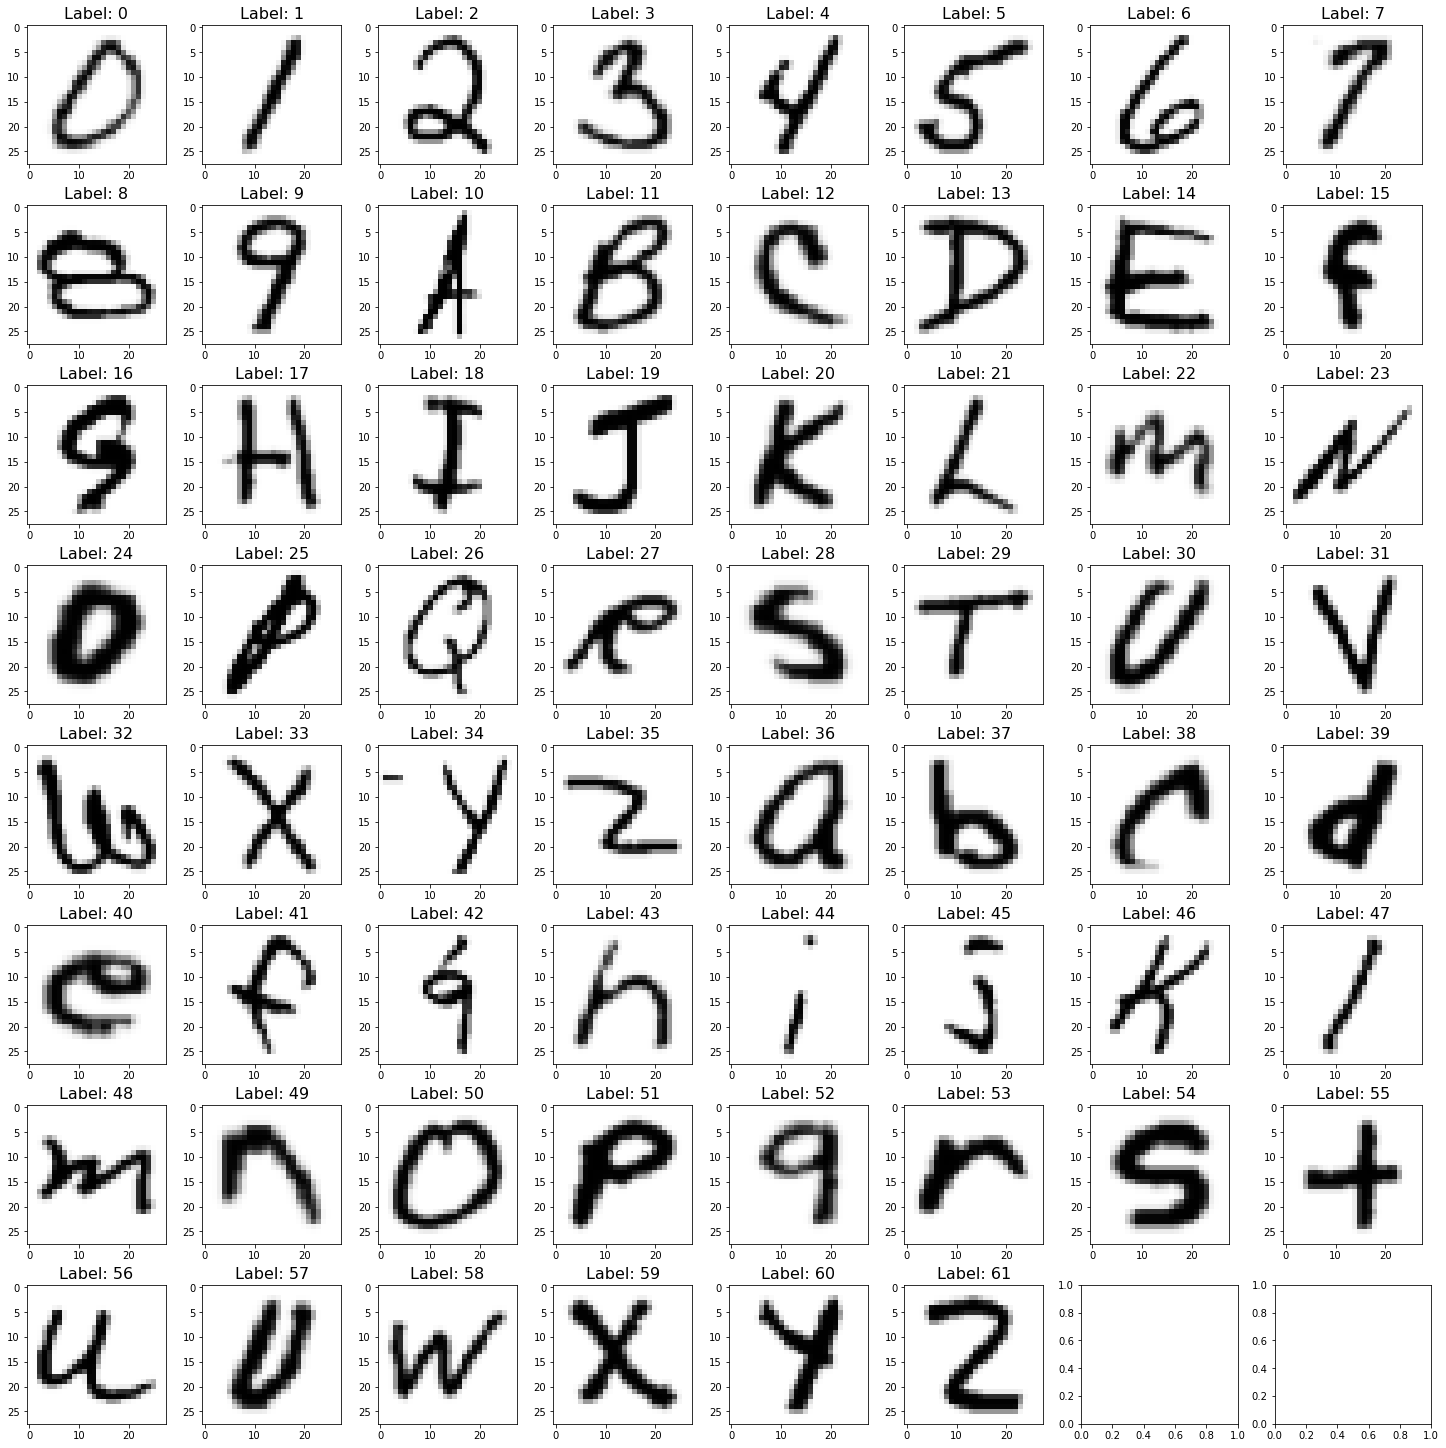

In [5]:
fig, ax = plt.subplots(8,8, figsize = (20,20), constrained_layout = True)
axes = ax.flatten()

for classes in range(len(np.unique(y_train))):
    for index, label in enumerate(y_train):
        if label == classes:
            axes[classes].imshow(np.reshape(x_train[index], (28,28)), cmap='Greys')
            axes[classes].set_title('Label: {}'.format(label), fontsize=16)
            break
            
plt.show()

Label: 9


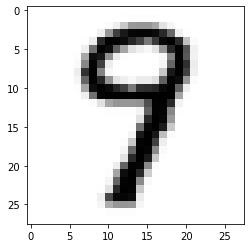

In [6]:
print('Label: {}'.format(y_train[0]))
plt.imshow(np.reshape(x_train[0], (28,28)), cmap='Greys')

In [7]:
# Dictionary for getting characters from index values...
word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',
             10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z',
             36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',46:'k',47:'l',48:'m',49:'n',50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',61:'z'}

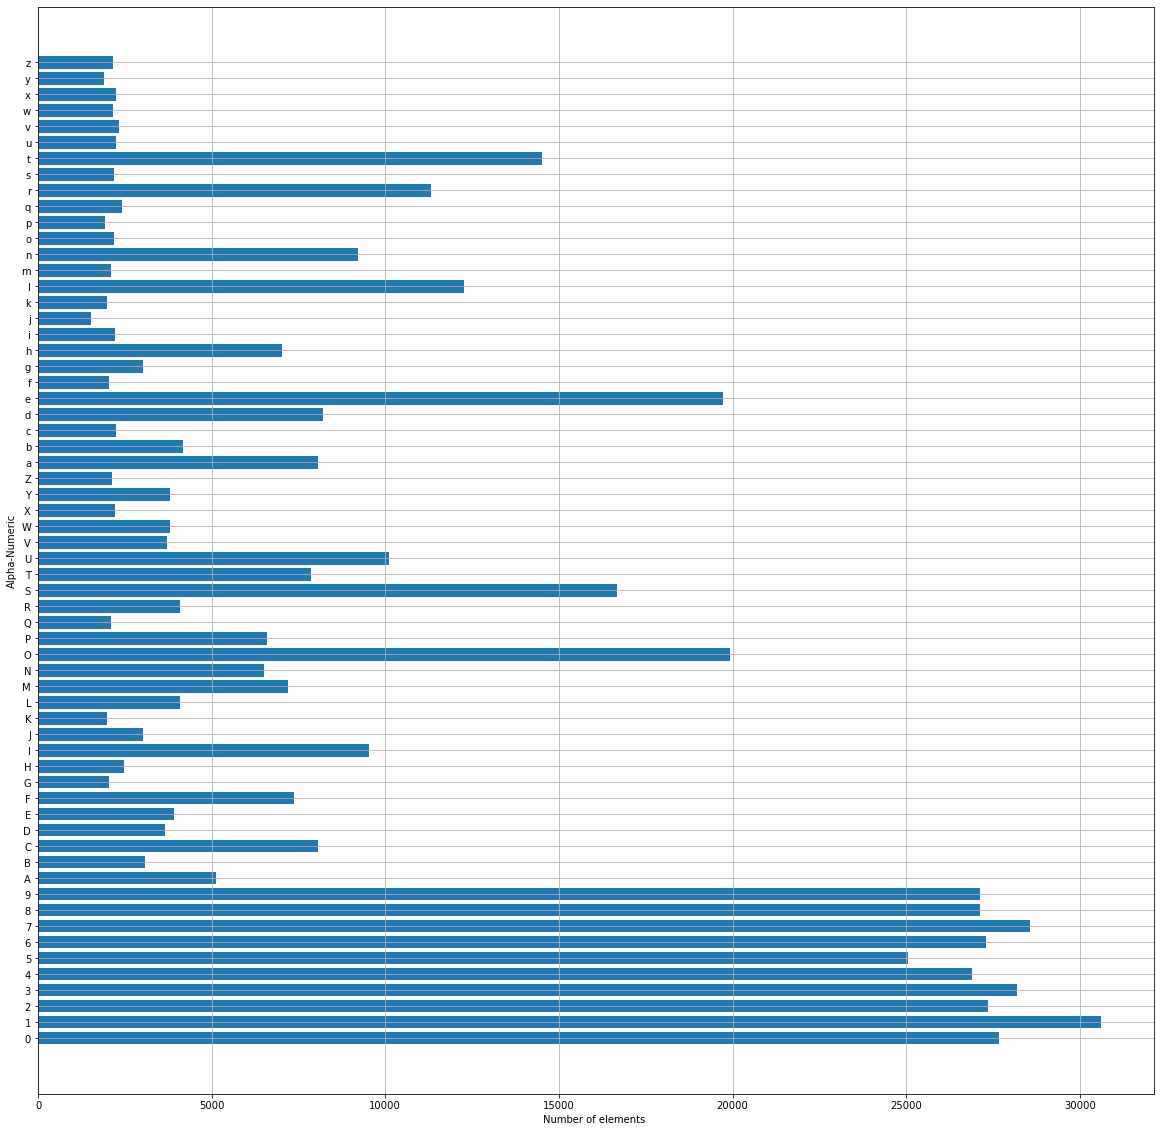

In [8]:
# Plotting the number of alph-numeric in the dataset...

train_yint = np.int0(y_train)
count = np.zeros(num_classes, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alpha-Numeric")
plt.grid()
plt.show()

## Pre-Processing

In [9]:
def normalizing(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.bitwise_not(img)
    img = img / 255.
    return img

# Normalize Data
x_train = np.array(list(map(normalizing, x_train)))
x_test = np.array(list(map(normalizing, x_test)))
x_val = np.array(list(map(normalizing, x_val)))

In [10]:
# reshape images
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)

print(f'New Shape of x_train: {x_train.shape}')
print(f'New Shape of x_test: {x_test.shape}')
print(f'New Shape of x_val: {x_val.shape}')

New Shape of x_train: (558345, 28, 28, 1)
New Shape of x_test: (116323, 28, 28, 1)
New Shape of x_val: (139587, 28, 28, 1)


In [11]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                          height_shift_range=0.1,
                                                          zoom_range=0.2,
                                                          shear_range=0.1,
                                                          rotation_range=10)

dataGen.fit(x_train)

In [12]:
# before processing label data
for i in range(5):
    print(y_train[i])
print("Shape of train labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)
print("Shape of validation labels: ", y_val.shape)

9
36
23
12
4
Shape of train labels:  (558345,)
Shape of test labels:  (116323,)
Shape of validation labels:  (139587,)


In [13]:
# after one-hot enconding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

for i in range(5):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
print("New shape of train labels: ", y_train.shape)
print("New shape of test labels: ", y_test.shape)
print("New shape of validation labels: ", y_val.shape)

New shape of train labels:  (558345, 62)
New shape of test labels:  (116323, 62)
New shape of validation labels:  (139587, 62)


## Model

In [15]:
# Simple CNN model...

firstModel = tf.keras.models.Sequential()

firstModel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
firstModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

firstModel.add(tf.keras.layers.Flatten())

firstModel.add(tf.keras.layers.Dense(150,activation ="relu"))

firstModel.add(tf.keras.layers.Dense(62,activation ="softmax"))

firstModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [16]:
firstModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 150)               1622550   
                                                                 
 dense_1 (Dense)             (None, 62)                9362      
                                                                 
Total params: 1,632,552
Trainable params: 1,632,552
Non-trainable params: 0
______________________________________________

In [17]:
firstHistory = firstModel.fit(x=x_train, y=y_train, epochs=60, callbacks=[reduce_lr, early_stop], validation_data=(x_val, y_val), shuffle=1)

Epoch 1/60
17449/17449 [==============================] - 66s 3ms/step - loss: 0.7527 - accuracy: 0.7744 - val_loss: 0.5406 - val_accuracy: 0.8235 - lr: 1.0000e-04
Epoch 2/60
17449/17449 [==============================] - 60s 3ms/step - loss: 0.4968 - accuracy: 0.8328 - val_loss: 0.4788 - val_accuracy: 0.8381 - lr: 1.0000e-04
Epoch 3/60
17449/17449 [==============================] - 60s 3ms/step - loss: 0.4510 - accuracy: 0.8446 - val_loss: 0.4544 - val_accuracy: 0.8434 - lr: 1.0000e-04
Epoch 4/60
17449/17449 [==============================] - 61s 3ms/step - loss: 0.4249 - accuracy: 0.8515 - val_loss: 0.4386 - val_accuracy: 0.8477 - lr: 1.0000e-04
Epoch 5/60
17449/17449 [==============================] - 60s 3ms/step - loss: 0.4063 - accuracy: 0.8561 - val_loss: 0.4287 - val_accuracy: 0.8501 - lr: 1.0000e-04
Epoch 6/60
17449/17449 [==============================] - 61s 4ms/step - loss: 0.3921 - accuracy: 0.8597 - val_loss: 0.4155 - val_accuracy: 0.8543 - lr: 1.0000e-04
Epoch 7/60
17449

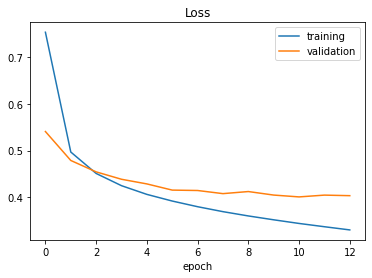

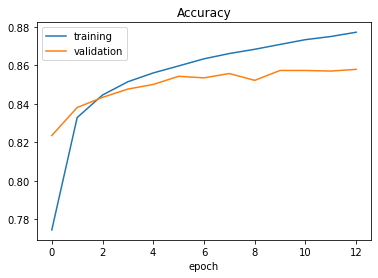

In [18]:
# Graph
plt.figure(1)
plt.plot(firstHistory.history['loss'])
plt.plot(firstHistory.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
# Graph
plt.figure(2)
plt.plot(firstHistory.history['accuracy'])
plt.plot(firstHistory.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [19]:
# Complex CNN model...

secondModel = tf.keras.models.Sequential()

secondModel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
secondModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

secondModel.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
secondModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

secondModel.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'valid'))
secondModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

secondModel.add(tf.keras.layers.Flatten())

secondModel.add(tf.keras.layers.Dense(150,activation ="relu"))
secondModel.add(tf.keras.layers.Dense(300,activation ="relu"))

secondModel.add(tf.keras.layers.Dense(62,activation ="softmax"))


secondModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [20]:
secondModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 256)       

In [22]:
secondHistory = secondModel.fit(x=x_train, y=y_train, epochs=60, callbacks=[reduce_lr, early_stop], validation_data=(x_val, y_val), shuffle=1)

Epoch 1/60
17449/17449 [==============================] - 84s 5ms/step - loss: 0.6059 - accuracy: 0.8026 - val_loss: 0.4367 - val_accuracy: 0.8423 - lr: 1.0000e-04
Epoch 2/60
17449/17449 [==============================] - 83s 5ms/step - loss: 0.4060 - accuracy: 0.8525 - val_loss: 0.3925 - val_accuracy: 0.8574 - lr: 1.0000e-04
Epoch 3/60
17449/17449 [==============================] - 84s 5ms/step - loss: 0.3723 - accuracy: 0.8621 - val_loss: 0.3770 - val_accuracy: 0.8612 - lr: 1.0000e-04
Epoch 4/60
17449/17449 [==============================] - 85s 5ms/step - loss: 0.3530 - accuracy: 0.8675 - val_loss: 0.3670 - val_accuracy: 0.8631 - lr: 1.0000e-04
Epoch 5/60
17449/17449 [==============================] - 84s 5ms/step - loss: 0.3391 - accuracy: 0.8714 - val_loss: 0.3591 - val_accuracy: 0.8668 - lr: 1.0000e-04
Epoch 6/60
17449/17449 [==============================] - 87s 5ms/step - loss: 0.3282 - accuracy: 0.8745 - val_loss: 0.3559 - val_accuracy: 0.8676 - lr: 1.0000e-04
Epoch 7/60
17449

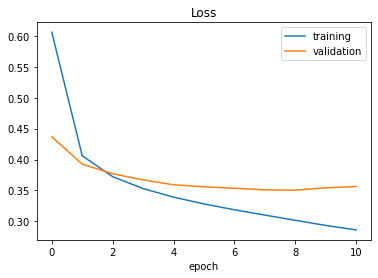

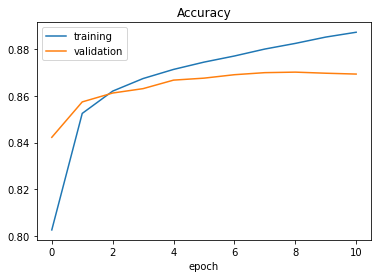

In [23]:
# Graph
plt.figure(1)
plt.plot(secondHistory.history['loss'])
plt.plot(secondHistory.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
# Graph
plt.figure(2)
plt.plot(secondHistory.history['accuracy'])
plt.plot(secondHistory.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [24]:
# Data Augmented CNN model...

augModel = tf.keras.models.Sequential()

augModel.add(tf.keras.layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
augModel.add(tf.keras.layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu'))
augModel.add(tf.keras.layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu'))
augModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

augModel.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
augModel.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu'))
augModel.add(tf.keras.layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu'))
augModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

augModel.add(tf.keras.layers.Dropout(0.5))
augModel.add(tf.keras.layers.Flatten())

augModel.add(tf.keras.layers.Dense(500,activation ="relu"))
augModel.add(tf.keras.layers.Dropout(0.25))
augModel.add(tf.keras.layers.Dense(250,activation ="relu"))
augModel.add(tf.keras.layers.Dropout(0.25))

augModel.add(tf.keras.layers.Dense(62,activation ="softmax"))


augModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [25]:
augModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 60)        600       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        32460     
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 60)        32460     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 60)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 30)          16230     
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 30)          8130      
                                                      

In [26]:
augHistory = augModel.fit(dataGen.flow(x_train,y_train), epochs=60, callbacks=[reduce_lr, early_stop], validation_data=(x_val, y_val), shuffle=1)

Epoch 1/60
17449/17449 [==============================] - 121s 7ms/step - loss: 1.5937 - accuracy: 0.5494 - val_loss: 0.6296 - val_accuracy: 0.7893 - lr: 1.0000e-04
Epoch 2/60
17449/17449 [==============================] - 124s 7ms/step - loss: 0.9433 - accuracy: 0.7010 - val_loss: 0.5371 - val_accuracy: 0.8107 - lr: 1.0000e-04
Epoch 3/60
17449/17449 [==============================] - 123s 7ms/step - loss: 0.8001 - accuracy: 0.7401 - val_loss: 0.5233 - val_accuracy: 0.8127 - lr: 1.0000e-04
Epoch 4/60
17449/17449 [==============================] - 123s 7ms/step - loss: 0.7195 - accuracy: 0.7630 - val_loss: 0.4688 - val_accuracy: 0.8308 - lr: 1.0000e-04
Epoch 5/60
17449/17449 [==============================] - 119s 7ms/step - loss: 0.6723 - accuracy: 0.7762 - val_loss: 0.4663 - val_accuracy: 0.8282 - lr: 1.0000e-04
Epoch 6/60
17449/17449 [==============================] - 121s 7ms/step - loss: 0.6382 - accuracy: 0.7860 - val_loss: 0.4480 - val_accuracy: 0.8356 - lr: 1.0000e-04
Epoch 7/60

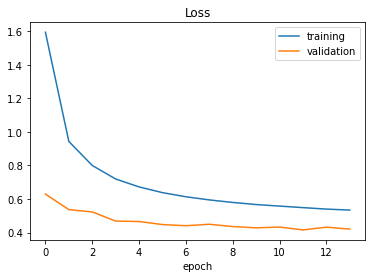

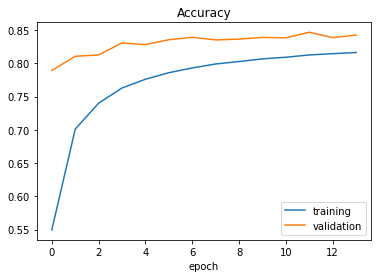

In [27]:
# Graph
plt.figure(1)
plt.plot(augHistory.history['loss'])
plt.plot(augHistory.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
# Graph
plt.figure(2)
plt.plot(augHistory.history['accuracy'])
plt.plot(augHistory.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

## Evaluate

In [28]:
test_loss, test_acc = firstModel.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}, Test Accuracy: {} using FIRST MODEL'.format(test_loss, test_acc))

test_loss, test_acc = secondModel.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}, Test Accuracy: {} using Second MODEL'.format(test_loss, test_acc))

test_loss, test_acc = augModel.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}, Test Accuracy: {} using THIRD MODEL'.format(test_loss, test_acc))

Test Loss: 0.401395320892334, Test Accuracy: 0.8575518131256104 using FIRST MODEL
Test Loss: 0.3541097044944763, Test Accuracy: 0.8684954643249512 using Second MODEL
Test Loss: 0.41772615909576416, Test Accuracy: 0.8431522846221924 using THIRD MODEL


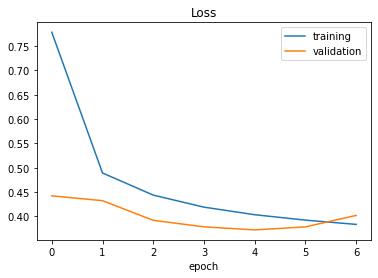

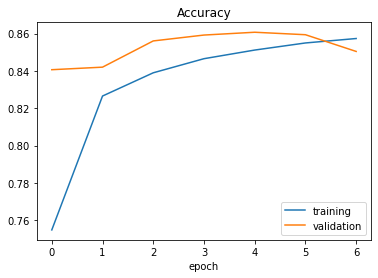

In [39]:
# Graph
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
# Graph
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [40]:
model.save(r'emnist-nn.h5')

### Inceptionv3

In [ ]:
inceptionv3 = tf.keras.applications.in

In [ ]:
complexModel = tf.keras.models.Sequential()

complexModel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
complexModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

complexModel.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
complexModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

complexModel.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'valid'))
complexModel.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

complexModel.add(tf.keras.layers.Flatten())

complexModel.add(tf.keras.layers.Dense(150,activation ="relu"))
complexModel.add(tf.keras.layers.Dense(300,activation ="relu"))

complexModel.add(tf.keras.layers.Dense(62,activation ="softmax"))


complexModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')